![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [37]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [38]:
#Dummy varible with categorical row
penguins_df['sex'] = pd.get_dummies(penguins_df['sex'], drop_first='true')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [39]:
#Scaling data
scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df)

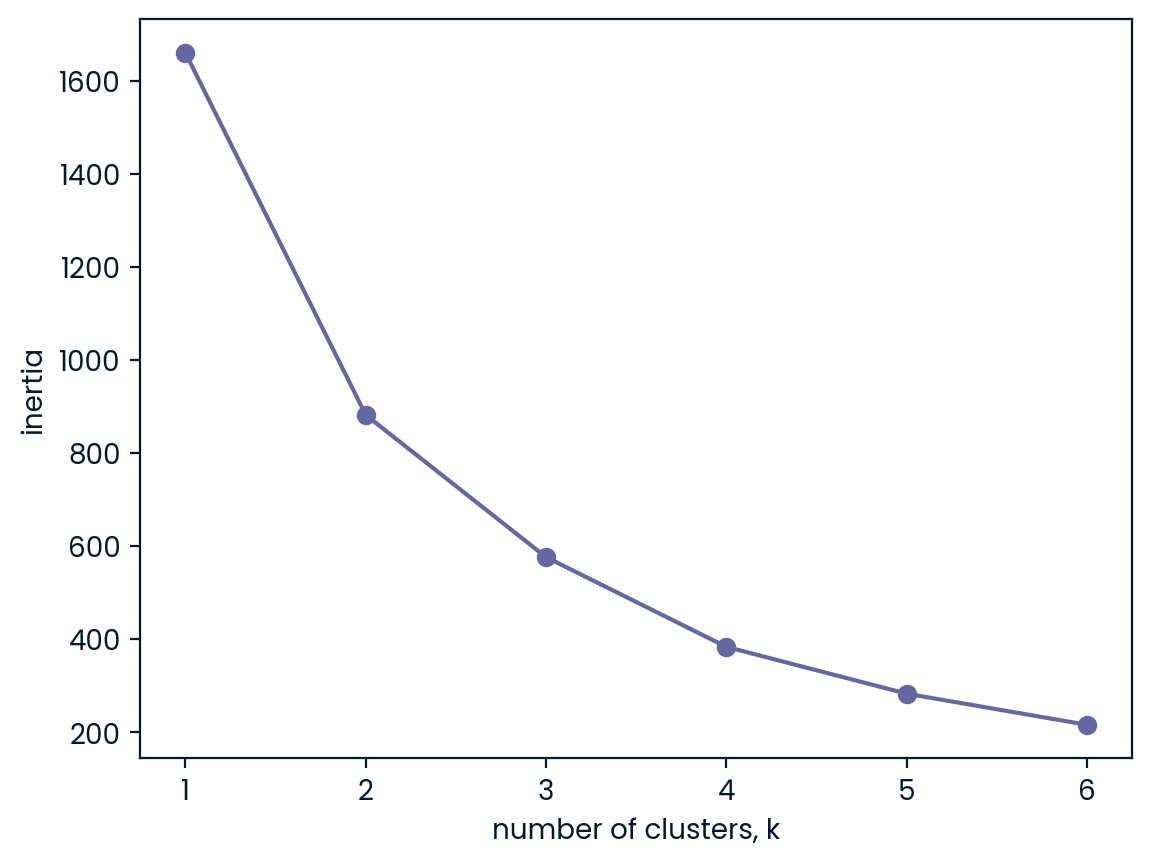

In [40]:
#Optimal number of clusters
ks = range(1, 7)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(penguins_df_scaled)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

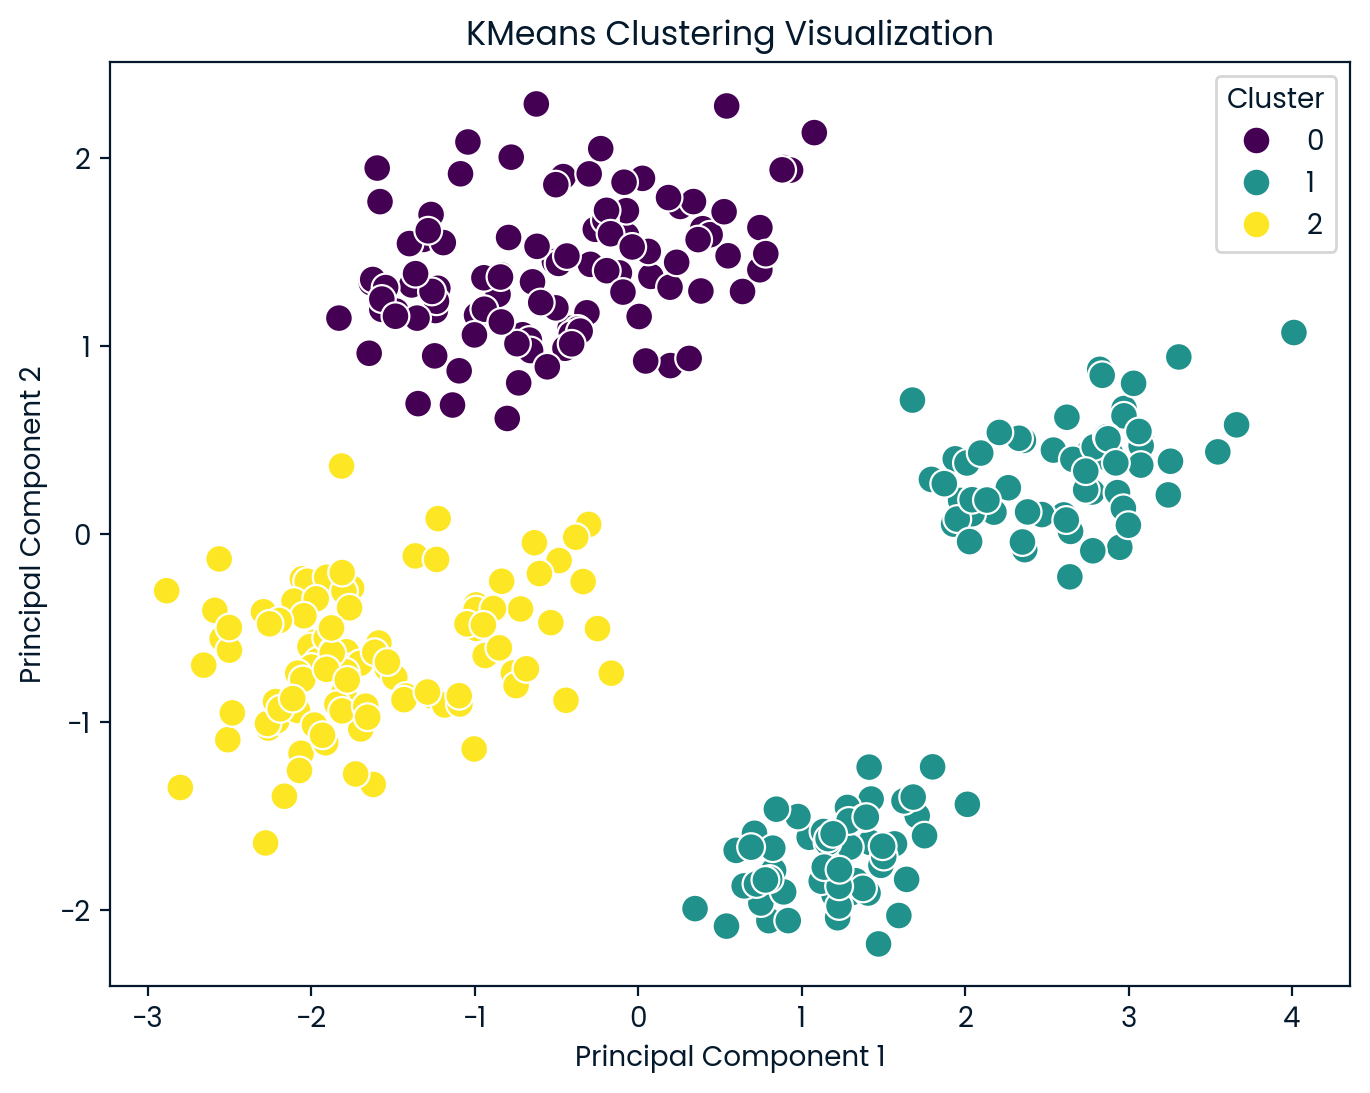

In [41]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(penguins_df_scaled)
labels = pd.DataFrame(kmeans.labels_)

pca = PCA(n_components=2)
penguins_2d = pca.fit_transform(penguins_df_scaled)

# Создание DataFrame для визуализации
penguins_2d_df = pd.DataFrame(penguins_2d, columns=['PCA1', 'PCA2'])
penguins_2d_df['Cluster'] = kmeans.labels_  # Добавляем метки кластеров

# Построение графика
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=penguins_2d_df, palette='viridis', s=100)
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [42]:
numeric_columns = penguins_df.drop(['sex'], axis=1).columns
penguins_df['label'] = kmeans.labels_
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()